In [1]:
# Importing libraries and Setting Dislplay Options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics


#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

# Web Scraping

In [2]:
players = []
for i in range(0,30000,60):
    url_list = f'https://sofifa.com/?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset={i}'
    #print(url_list)
    response = requests.get(url_list)
    #print(response)
    page = response.text
    #print(page)
    soup = BeautifulSoup(page,"lxml")
    #print(soup.prettify)
    rows = soup.find_all("tr")
    #print(rows)
    for row in rows:
        cells = row.find_all('td')
        #print(cells)
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        #print(cells_sub)
        players.append(cells_sub)
        result = pd.DataFrame(players)

In [3]:
print("Number of rows before cleanning duplicates")
print(len(result));
print("")
print("Number of rows after cleanning duplicates")
result.drop_duplicates(subset=None, keep="first", inplace=True)
print(len(result))

Number of rows before cleanning duplicates
29739

Number of rows after cleanning duplicates
17751


# Creating serializable file

In [4]:
#Saving result data frame as a Pickle File
result.to_pickle("PlayerListInitialPickle")

In [5]:
#Reading result from Pickle File as a data frame
result = pd.read_pickle("PlayerListInitialPickle")

In [6]:
# Getting table name (header)
table_players = soup.find("table",attrs={"class":"table table-hover persist-area"})
header_players = table_players.find_all("th")
column_name_players = []
for row in header_players:
    column_name_players.append(row.text)
column_name_players

['',
 'Name',
 'Age',
 'OVA',
 'POT',
 'Team & Contract',
 'ID',
 'Height',
 'Weight',
 'foot',
 'BOV',
 'BP',
 'Growth',
 'Value',
 'Wage',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

In [7]:
# Setting columns names
new_column_name_players = [
 'Name',
 'Age',
 'Overall',
 'Potential',
 'Team',
 'Height',
 'Weight',
 'Foot',
 'Best_Overall',
 'Position',
 'Growth',
 'Value',
 'Wage',
 'Release_Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits']

# Data cleaning

In [8]:

result = pd.read_pickle("PlayerListInitialPickle")
#print(result)
result = result[0].str.split(',',expand=True)


result[1] = result[1].str.replace("\n ","")
#print(result)

chars_to_remove = ["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM","RW","RF","CF","LF","LW","LS","ST","RS"]
for char in chars_to_remove:
    result[1]=result[1].str.replace(char,"")
    result[1]=result[1].str.lstrip()

result[5] = result[5].str.replace("\n\n\n\n","")
result[5] = result[5].str.split("\n").str[0]
result[5] = result[5].str.strip()

result[6] = result[6].replace(r'Loan', np.nan, regex=True)
result = result.iloc[1:]

#result
result_WoLoan = result[result[6].notna()]

result_WoLoan.drop(result_WoLoan.columns[[0,6,66,67,68,69]],axis=1, inplace=True)

mask_loan = result[6].isnull()

result_loan = result.loc[mask_loan].shift(-1, axis=1)

result_loan.drop_duplicates(subset=[6], keep="first", inplace=True)

result_loan.drop(result_loan.columns[[5,6,66,67,68,69]],axis=1, inplace=True)

result_WoLoan.columns = new_column_name_players

result_loan.columns = new_column_name_players

result_master = pd.concat([result_WoLoan,result_loan]).reset_index()
del result_master["index"]

result_master.drop_duplicates(subset=None, keep="first",inplace=True)

#result_master

C:\Users\adir4\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
#Cleaning some characters

result_master = result_master[~result_master["Height"].str.contains("~")]
result_master = result_master[~result_master["Age"].str.contains("\n")]
result_master = result_master[result_master["Height"].str.contains("'")]

In [10]:
#Converting Height column to cm

result_master["Height"] = result_master["Height"].str[:-1]

def parse_height(height):
    # format: 5'11"
    height = height.split("'")
    feet = float(height[0])
    inch = float(height[1])
    return ((feet*30.48) + (inch*2.54))

result_master["Height"]=round(result_master["Height"].apply(lambda x:parse_height(x)),0)

In [11]:

#Converting Weight column to kg
result_master["Weight"] = round(result_master["Weight"].str.split("lbs").str[0].astype(float)*0.45359237,0)

In [12]:

#Cleaning to Value column and convert to decimal
result_master["Value"] = result_master["Value"].str.replace("€","")
result_master["Value"] = result_master["Value"].str.replace("M","")
result_master.loc[result_master["Value"].str.contains("K"),"Value"]=result_master["Value"].str.split("K").str[0].astype(float)/1000
result_master["Value"] = round(result_master["Value"].astype(float),2)
result_master = result_master.loc[result_master["Value"]>0]

In [13]:
#Cleaning Wage column and convert to decimal
result_master["Wage"] = result_master["Wage"].str.replace("€","")
result_master.loc[result_master["Wage"].str.contains("K"),"Wage"]=result_master["Wage"].str.split("K").str[0].astype(float)*1000
result_master["Wage"] = round(result_master["Wage"].astype(float)/1000000,5)

In [14]:
#Cleaning Release_Clause column and convert to decimal
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("€","")
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("M","")
result_master.loc[result_master["Release_Clause"].str.contains("K"),"Release_Clause"]=result_master["Release_Clause"].str.split("K").str[0].astype(float)/1000
result_master["Release_Clause"] = round(result_master["Release_Clause"].astype(float),2)

In [15]:
#Checking Height,Weight,Value,Wage and Release_Clause columns
result_master.head(10)

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,20 PC,25,64,66,Vancouver Whitecaps FC,173.0,73.0,Left,63,LB,2,0.48,0.0020,0.72,249,56,42,51,64,36,270,64,57,35,56,58,346,73,60,77,60,76,279,56,51,67,60,45,280,69,64,53,53,41,67,193,59,66,68,61,14,8,15,8,16,1678,358,1 ★,66,46,57,64,62,63,None
1,Adama Traoré,24,78,81,Wolverhampton Wanderers,178.0,72.0,Right,80,RM,3,19.00,0.0720,37.50,307,78,66,40,71,52,338,92,67,42,54,83,432,97,96,85,66,88,386,78,79,77,87,65,289,70,41,64,67,47,73,110,37,38,35,52,13,9,11,12,7,1914,435,1 ★,96,66,67,87,38,81,None
2,R. Gosens,25,83,83,Atalanta,183.0,76.0,Left,83,LM,0,40.50,0.0740,68.90,394,82,79,82,80,71,367,80,70,58,77,82,390,84,84,70,86,66,397,76,91,86,76,68,370,80,77,86,77,50,77,232,75,78,79,64,7,16,15,16,10,2214,473,1 ★,84,75,78,79,77,80,None
3,N. Kanté,29,88,88,Chelsea,168.0,70.0,Right,88,CDM,0,78.00,0.1900,148.20,328,68,65,54,85,56,336,79,49,49,79,80,420,79,76,82,91,92,381,71,77,96,72,65,386,90,91,72,79,54,85,264,89,90,85,54,15,12,10,7,10,2169,468,3 ★,77,66,76,81,86,82,None
4,N. Vlašić,22,80,86,PFC CSKA Moscow,178.0,79.0,Right,82,CAM,6,34.00,0.0470,61.20,365,71,76,65,81,72,380,85,70,68,77,80,409,82,83,78,78,88,365,80,55,80,69,81,319,68,26,77,82,66,77,146,54,55,37,58,6,14,15,9,14,2042,439,1 ★,83,77,77,83,48,71,None
5,M. Mount,21,82,88,Chelsea,178.0,70.0,Right,84,CAM,6,49.00,0.0810,102.90,379,82,79,59,85,74,408,81,79,82,82,84,384,78,70,79,81,76,343,80,51,80,52,80,349,68,58,80,83,60,81,147,51,56,40,56,11,12,13,8,12,2066,432,1 ★,74,78,83,81,54,62,None
6,N. Mazraoui,22,79,84,Ajax,183.0,62.0,Right,80,RB,5,25.00,0.0160,36.90,339,74,63,65,81,56,334,82,67,33,73,79,382,81,83,86,77,55,338,67,69,81,67,54,333,69,78,73,76,37,75,221,74,74,73,56,12,7,13,12,12,2003,442,2 ★,82,61,74,80,74,71,None
9,S. Giménez,19,66,83,Cruz Azul,183.0,69.0,Left,68,ST,17,2.20,0.0100,5.10,310,42,70,73,62,63,254,55,48,36,45,70,318,72,60,63,60,63,325,62,62,57,79,65,280,61,31,60,54,74,48,78,29,31,18,48,6,14,12,6,10,1613,347,1 ★,65,67,52,61,33,69,None
10,W. Faríñez,22,74,78,Racing Club de Lens,180.0,77.0,Right,74,GK,4,4.90,0.0200,10.20,94,18,19,17,25,15,108,14,22,18,29,25,306,51,54,69,67,65,239,52,75,41,51,20,144,23,17,15,66,23,45,62,25,16,21,361,71,69,69,74,78,1314,414,1 ★,71,69,69,78,53,74,None
11,N. Konstandopoulos,24,60,63,Adelaide United,180.0,78.0,Right,63,RM,3,0.32,0.0008,0.43,257,52,47,51,65,42,285,62,49,48,63,63,330,71,73,69,52,65,285,53,46,72,60,54,260,53,51,57,56,43,58,170,54,59,57,60,11,13,11,11,14,1647,360,1 ★,72,50,59,63,55,61,None


In [16]:
#Deleting some rows that composure columns is blank (Ronaldinho, Juninho, Xavi etc)
result_master = result_master.loc[result_master["Composure"]!=" "]
result_master = result_master[result_master["Base_Stats"]!=' ']

In [17]:
#Cleaning to IR column
result_master["Int_Reputation"]=result_master["Int_Reputation"].str[:-1]

In [18]:
#Checking null values
result_master.isnull().any()

Name                False
Age                 False
Overall             False
Potential           False
Team                False
Height              False
Weight              False
Foot                False
Best_Overall        False
Position            False
Growth              False
Value               False
Wage                False
Release_Clause      False
Attacking           False
Crossing            False
Finishing           False
Heading_Accuracy    False
Short_Passing       False
Volleys             False
Skill               False
Dribbling           False
Curve               False
FK_Accuracy         False
Long_Passing        False
Ball_Control        False
Movement            False
Acceleration        False
Sprint_Speed        False
Agility             False
Reactions           False
Balance             False
Power               False
Shot_Power          False
Jumping             False
Stamina             False
Strength            False
Long_Shots          False
Mentality   

In [19]:
#Checking columns dtypes
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 17749
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              15265 non-null  object 
 1   Age               15265 non-null  object 
 2   Overall           15265 non-null  object 
 3   Potential         15265 non-null  object 
 4   Team              15265 non-null  object 
 5   Height            15265 non-null  float64
 6   Weight            15265 non-null  float64
 7   Foot              15265 non-null  object 
 8   Best_Overall      15265 non-null  object 
 9   Position          15265 non-null  object 
 10  Growth            15265 non-null  object 
 11  Value             15265 non-null  float64
 12  Wage              15265 non-null  float64
 13  Release_Clause    15265 non-null  float64
 14  Attacking         15265 non-null  object 
 15  Crossing          15265 non-null  object 
 16  Finishing         15265 non-null  object

In [20]:
#Converting to int dtypes

cols_to_convert=['Age',
 'Overall',
 'Potential',
 'Best_Overall',
 'Growth',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

for col in cols_to_convert:
    result_master[col] = result_master[col].astype("int")

In [21]:
result_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 17749
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              15265 non-null  object 
 1   Age               15265 non-null  int32  
 2   Overall           15265 non-null  int32  
 3   Potential         15265 non-null  int32  
 4   Team              15265 non-null  object 
 5   Height            15265 non-null  float64
 6   Weight            15265 non-null  float64
 7   Foot              15265 non-null  object 
 8   Best_Overall      15265 non-null  int32  
 9   Position          15265 non-null  object 
 10  Growth            15265 non-null  int32  
 11  Value             15265 non-null  float64
 12  Wage              15265 non-null  float64
 13  Release_Clause    15265 non-null  float64
 14  Attacking         15265 non-null  int32  
 15  Crossing          15265 non-null  int32  
 16  Finishing         15265 non-null  int32 

In [22]:
#Descriptive Statistics of numeric columns
result_master.describe()

,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
count,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.00000,15265.000000,15265.000000,15265.000000,15265.000000,15265.00000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000
mean,24.778578,67.010809,72.336652,181.256404,75.096757,67.921913,5.325843,3.320145,0.010944,5.761606,258.856797,51.595414,47.971962,53.575827,60.707239,45.006354,267.803734,58.014805,49.869047,44.441271,54.762791,60.715821,323.374648,65.506060,65.587815,64.636947,62.950344,64.693482,302.806813,59.882738,65.06171,63.385981,65.303963,49.172421,262.789125,57.23734,47.480445,52.397838,55.677367,49.996135,60.266164,142.899443,47.628366,48.756371,46.514707,77.735211,15.651228,15.486931,15.325712,15.513790,15.757550,1636.265771,362.436816,1.136259,68.245398,55.063151,59.123420,64.363053,50.672715,64.969080
std,4.916264,6.824571,5.756826,6.819612,7.103265,6.641743,5.706547,7.942117,0.020839,15.208060,72.444254,17.836083,19.337077,17.001928,13.893535,17.729068,76.902922,18.108713,18.217068,17.438894,14.729959,15.884313,54.509783,14.585103,14.318779,14.313858,8.960972,13.923239,49.494979,13.291720,11.79247,15.245922,12.564257,19.087473,63.507154,17.03545,20.879553,19.169457,13.589211,15.672731,11.672347,61.708160,20.296261,21.457968,21.110510,81.226946,16.861590,16.145490,15.787530,16.374758,17.155087,262.642868,40.012229,0.431693,10.895650,13.700356,9.970303,9.683020,16.833748,9.680947
min,16.000000,45.000000,46.000000,155.000000,48.000000,44.000000,0.000000,0.010000,0.000500,0.000000,43.000000,6.000000,3.000000,7.000000,8.000000,3.000000,40.000000,5.000000,6.000000,5.000000,9.000000,7.000000,120.000000,12.000000,12.000000,11.000000,28.000000,17.000000,109.000000,12.000000,18.00000,11.000000,16.000000,4.000000,50.000000,10.00000,4.000000,2.000000,10.000000,7.000000,12.000000,20.000000,3.000000,7.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,752.000000,232.000000,1.000000,23.000000,14.000000,25.000000,28.000000,12.000000,27.000000
25%,21.000000,63.000000,68.000000,175.000000,70.000000,64.000000,0.000000,0.570000,0.002000,0.760000,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,234.000000,53.000000,38.000000,32.000000,46.000000,57.000000,296.000000,59.000000,59.000000,57.000000,57.000000,57.000000,272.000000,51.000000,58.00000,56.000000,58.000000,36.000000,236.000000,46.00000,27.000000,43.000000,47.000000,40.000000,53.000000,85.000000,30.000000,29.000000,26.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1502.000000,335.000000,1.000000,62.000000,46.000000,53.000000,59.000000,35.000000,59.000000
50%,24.000000,67.000000,72.000000,180.000000,75.000000,68.000000,4.000000,1.200000,0.004000,1.800000,272.000000,56.000000,52.000000,57.000000,64.000000,47.000000,281.000000,63.000000,52.000000,43.000000,58.000000,65.000000,332.000000,68.000000,68.000000,67.

In [23]:
#Saving Final Player List as Pickle
result_master.to_pickle("PlayerListFinalPickle")

In [24]:
#Reading Final Player List
players= pd.read_pickle("PlayerListFinalPickle")

# Exploratory Data Analyis

In [25]:
#Top 5 Valuable Player
players.nlargest(5,columns="Value")[["Name","Age","Team","Value"]]

,Name,Age,Team,Value
51,K. Mbappé,21,Paris Saint-Germain,185.5
81,K. De Bruyne,29,Manchester City,127.5
150,R. Lewandowski,31,FC Bayern München,124.5
101,H. Kane,26,Tottenham Hotspur,123.0
134,Bruno Fernandes,25,Manchester United,121.0


In [26]:
#Top 5 Rating Player
players.nlargest(5,columns="Overall")[["Name","Age","Team","Overall"]]

,Name,Age,Team,Overall
45,L. Messi,33,FC Barcelona,93
56,Cristiano Ronaldo,35,Juventus,92
150,R. Lewandowski,31,FC Bayern München,92
81,K. De Bruyne,29,Manchester City,91
412,J. Oblak,27,Atlético Madrid,91


In [27]:
#Mean Value (Top 5) based on Position

pd.DataFrame(players.groupby("Position").Value.mean().sort_values(ascending=False)).head(5)

,Value
Position,
CF,10.406000
CM,4.944525
LW,4.520611
RW,4.206786
CAM,4.032728


In [28]:

#Top 5 Clup (Mean Value)

pd.DataFrame(players.groupby("Team").Value.mean().sort_values(ascending=False).head(5))

,Value
Team,
FC Bayern München,38.611852
Manchester City,35.842812
Liverpool,32.371818
Real Madrid,31.205161
FC Barcelona,28.218182


In [29]:
#Top 5 Clup (Total Value)

pd.DataFrame(players.groupby("Team").Value.sum().sort_values(ascending=False).head(5))

,Value
Team,
Manchester City,1146.97
Liverpool,1068.27
FC Bayern München,1042.52
Real Madrid,967.36
FC Barcelona,931.20


In [30]:
#Age , Height and Weight Stats
players[["Age","Height","Weight"]].describe()

,Age,Height,Weight
count,15265.000000,15265.000000,15265.000000
mean,24.778578,181.256404,75.096757
std,4.916264,6.819612,7.103265
min,16.000000,155.000000,48.000000
25%,21.000000,175.000000,70.000000
50%,24.000000,180.000000,75.000000
75%,28.000000,185.000000,80.000000
max,45.000000,206.000000,110.000000


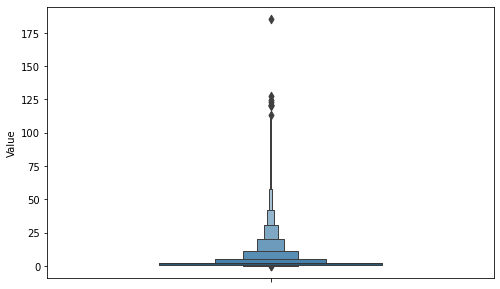

In [31]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=players, width=0.5)
plt.show()

C:\Users\adir4\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


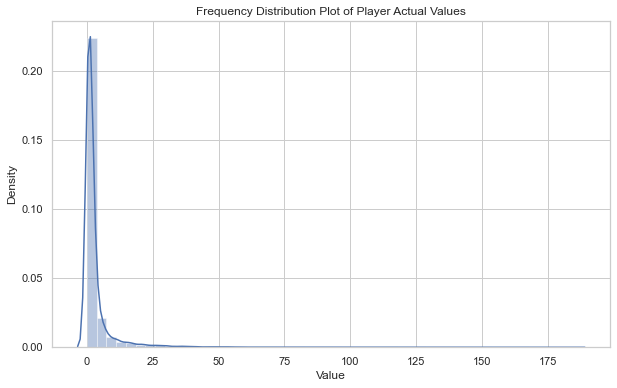

In [32]:
x = players.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

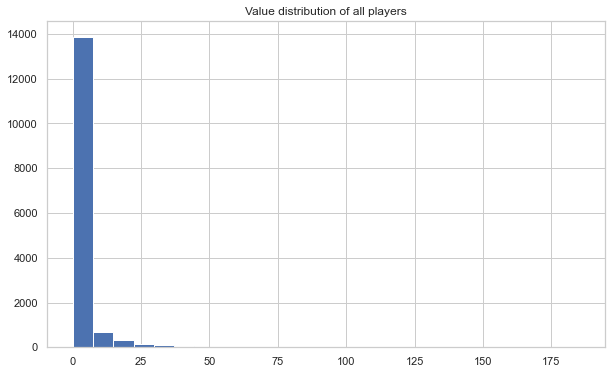

In [33]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=players)
plt.title('Value distribution of all players')
plt.show()

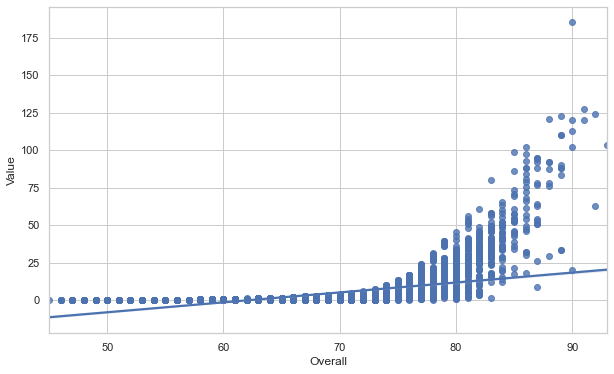

In [34]:
plt.figure(figsize=(10,6))
sns.regplot(x="Overall",y="Value",data=players)
plt.show()

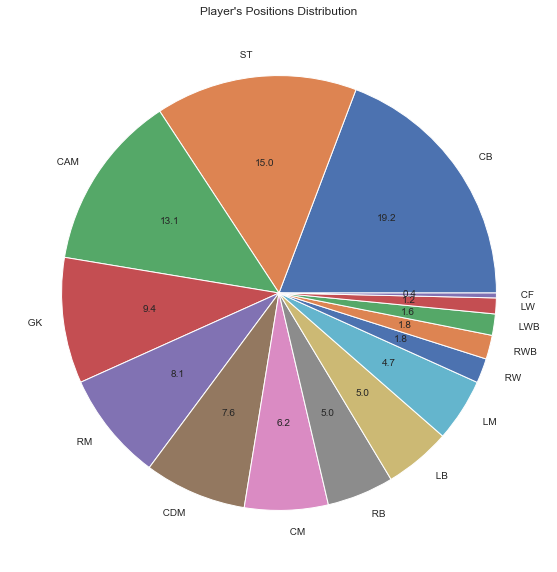

In [35]:
plt.figure(figsize=(10,10))
loc=players.Position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

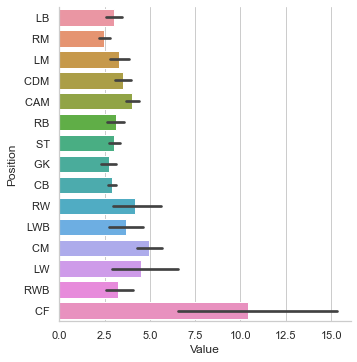

In [36]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Position", x="Value", kind="bar",  data=players)
plt.show()

In [37]:
#Changing columns order
players = players[['Name','Value','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
                           'Position','Growth','Wage','Release_Clause','Attacking','Crossing','Finishing',
                           'Heading_Accuracy','Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy',
                           'Long_Passing','Ball_Control','Movement','Acceleration','Sprint_Speed','Agility',
                           'Reactions','Balance','Power','Shot_Power','Jumping','Stamina','Strength','Long_Shots',
                           'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                           'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving',
                           'GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats',
                           'Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']]
players

,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,20 PC,0.48,25,64,66,Vancouver Whitecaps FC,173.0,73.0,Left,63,LB,2,0.002,0.72,249,56,42,51,64,36,270,64,57,35,56,58,346,73,60,77,60,76,279,56,51,67,60,45,280,69,64,53,53,41,67,193,59,66,68,61,14,8,15,8,16,1678,358,1,66,46,57,64,62,63
1,Adama Traoré,19.00,24,78,81,Wolverhampton Wanderers,178.0,72.0,Right,80,RM,3,0.072,37.50,307,78,66,40,71,52,338,92,67,42,54,83,432,97,96,85,66,88,386,78,79,77,87,65,289,70,41,64,67,47,73,110,37,38,35,52,13,9,11,12,7,1914,435,1,96,66,67,87,38,81
2,R. Gosens,40.50,25,83,83,Atalanta,183.0,76.0,Left,83,LM,0,0.074,68.90,394,82,79,82,80,71,367,80,70,58,77,82,390,84,84,70,86,66,397,76,91,86,76,68,370,80,77,86,77,50,77,232,75,78,79,64,7,16,15,16,10,2214,473,1,84,75,78,79,77,80
3,N. Kanté,78.00,29,88,88,Chelsea,168.0,70.0,Right,88,CDM,0,0.190,148.20,328,68,65,54,85,56,336,79,49,49,79,80,420,79,76,82,91,92,381,71,77,96,72,65,386,90,91,72,79,54,85,264,89,90,85,54,15,12,10,7,10,2169,468,3,77,66,76,81,86,82
4,N. Vlašić,34.00,22,80,86,PFC CSKA Moscow,178.0,79.0,Right,82,CAM,6,0.047,61.20,365,71,76,65,81,72,380,85,70,68,77,80,409,82,83,78,78,88,365,80,55,80,69,81,319,68,26,77,82,66,77,146,54,55,37,58,6,14,15,9,14,2042,439,1,83,77,77,83,48,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17745,19 D. Depetris,1.80,28,70,70,Club Olimpo,183.0,75.0,Right,69,ST,0,0.010,0.00,316,41,71,72,64,68,278,66,67,39,35,71,320,67,71,68,54,60,364,72,72,82,72,66,282,51,38,71,51,71,65,61,18,22,21,51,13,8,11,10,9,1672,356,1,69,70,51,67,29,70
17746,20 Carlos Castro,0.57,24,64,67,CD Lugo,178.0,68.0,Left,65,ST,3,0.006,0.00,293,57,62,55,57,62,280,61,51,57,51,60,368,75,77,72,69,75,342,62,75,75,71,59,275,56,31,64,59,65,62,94,32,31,31,57,10,16,8,10,13,1709,360,1,76,62,56,63,34,69
17747,J. Silva,1.10,25,66,70,Club América,190.0,87.0,Right,68,CB,4,0.006,0.00,212,28,29,74,51,30,182,29,29,33,43,48,234,40,45,51,62,36,295,47,71,66,83,28,225,54,68,26,32,45,60,201,68,65,68,44,8,6,15,8,7,1393,294,1,43,33,39,39,68,72
17748,18 J. García Sancho,0.42,22,63,69,Lobos BUAP,183.0,81.0,Right,62,CB,6,0.002,0.00,210,33,28,60,57,32,191,48,27,35,34,47,270,60,54,43,52,61,246,40,71,43,69,23,224,64,58,31,28,43,51,193,62,66,65,55,9,7,13,11,15,1389,301,1,57,31,40,48,63,62


In [38]:
#View the correlations
corr_mat = players.corr()
corr_mat

,Value,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
Value,1.000000,0.063538,0.567847,0.538294,0.004608,0.036773,0.577887,-0.136062,0.793371,0.975712,0.254052,0.218149,0.202387,0.154850,0.296550,0.216999,0.261466,0.228619,0.232567,0.196868,0.280133,0.262605,0.238709,0.153335,0.158570,0.167620,0.507111,0.112155,0.290522,0.290260,0.123389,0.213819,0.129473,0.218974,0.270171,0.171759,0.145894,0.213765,0.323052,0.172134,0.392502,0.126806,0.148785,0.121167,0.104459,-0.000841,-0.000936,-0.001257,-0.001027,-0.000795,-0.000177,0.345785,0.475341,0.453532,0.200380,0.280891,0.400286,0.393802,0.166010,0.246789
Age,0.063538,1.000000,0.508411,-0.244876,0.086720,0.249796,0.441032,-0.855052,0.217573,0.054648,0.194903,0.160580,0.108621,0.186998,0.183762,0.193053,0.176150,0.046835,0.189342,0.227305,0.227910,0.121378,-0.036372,-0.178838,-0.167919,-0.024707,0.498431,-0.077757,0.328884,0.311594,0.226110,0.082481,0.359665,0.193511,0.280206,0.288242,0.198991,0.123662,0.240200,0.197495,0.435201,0.134092,0.174869,0.119724,0.102146,0.110164,0.105797,0.108591,0.106717,0.117617,0.104948,0.293096,0.414165,0.390108,-0.180257,0.301057,0.391473,0.232496,0.236770,0.441177
Overall,0.567847,0.508411,1.000000,0.600072,0.026832,0.148932,0.986031,-0.590560,0.603841,0.532194,0.437895,0.385434,0.307785,0.323882,0.507044,0.357910,0.445004,0.356893,0.394625,0.361097,0.493870,0.440592,0.320306,0.156383,0.170037,0.236595,0.874675,0.109148,0.566223,0.540374,0.280344,0.365879,0.358539,0.390506,0.500730,0.395262,0.318958,0.339795,0.512106,0.314815,0.714743,0.270854,0.312900,0.257336,0.229332,0.018165,0.016905,0.017043,0.013461,0.025037,0.017066,0.614597,0.834597,0.452740,0.207884,0.473250,0.696288,0.637489,0.361185,0.562986
Potential,0.538294,-0.244876,0.600072,1.000000,-0.026784,-0.042724,0.639492,0.291172,0.467709,0.513174,0.237670,0.201982,0.180418,0.143493,0.328411,0.176213,0.266649,0.267611,0.211416,0.156577,0.290650,0.301986,0.273662,0.207066,0.206999,0.190361,0.482154,0.135587,0.238630,0.274319,0.080184,0.195140,0.041831,0.194819,0.242839,0.138790,0.140012,0.190392,0.309267,0.145594,0.373027,0.140198,0.146813,0.139043,0.127331,-0.013827,-0.012558,-0.013706,-0.017447,-0.010891,-0.013777,0.332780,0.478625,0.266511,0.271194,0.245338,0.396775,0.449761,0.167017,0.176871
Height,0.004608,0.086720,0.026832,-0.026784,1.000000,0.760550,0.014731,-0.059110,0.022009,0.004089,-0.359414,-0.495444,-0.374263,0.056302,-0.347199,-0.343898,-0.459266,-0.487646,-0.450533,-0.409018,-0.314814,-0.409895,-0.635050,-0.555026,-0.457020,-0.641119,0.006114,-0.779651,-0.134308,-0.181651,0.023652,-0.271143,0.555437,-0.385427,-0.306253,-0.017965,-0.031473,-0.435853,-0.377764,-0.318867,-0.155693,-0.049134,-0.045057,-0.048479,-0.051026,0.349748,0.344973,0.345346,0.343070,0.345149,0.346742,-0.368153,-0.125962,0.038870,-0.386345,-0.109484,-0.214846,-0.319088,0.097019,0.440872
Weight,0.036773,0.249796,0.148932,-0.042724,0.760550,1.000000,0.126885,-0.221211,0.072287,0.031932,-0.259387,-0.392122,-0.284629,0.094107,-0.257267,-0.243609,-0.356563,-0.399794,-0.347717,-0.306423,-0.229687,-0.322308,-0.534300,-0.494989,-0.404339,-0.555099,0.116111,-0.661509,0.003501,-0.054328,0.103622,-0.210961,0.646127,-0.273918,-0.199369,0.065525,-0.005381,-0.335271,-0.280104,-0.218972,-0.041230,-0.029459,-0.016886,-0.031396,-0.037966,0.320305,0.314598,0.316085,0.314149,0.318487,0.316798,-0.242249,0.001038,0.114424,-0.345439,-0.010719,-0.106892,-0.215283,0.115165,0.533404
Best_Overall,0.577887,0.441032,0.986

In [39]:

#Correlation With Value (most correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(10)

,Value
Value,1.000000
Release_Clause,0.975712
Wage,0.793371
Best_Overall,0.577887
Overall,0.567847
Potential,0.538294
Reactions,0.507111
Base_Stats,0.475341
Int_Reputation,0.453532
PAS,0.400286


In [40]:
#Correlation With Value (least correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(10)

,Value
Growth,-0.136062
GK_Handling,-0.001257
GK_Kicking,-0.001027
GK_Diving,-0.000936
Goalkeeping,-0.000841
GK_Positioning,-0.000795
GK_Reflexes,-0.000177
Height,0.004608
Weight,0.036773
Age,0.063538


# Machine learning

In [41]:
# Slice data into faeture and target

Xb= players.drop(columns=["Value","Name","Team","Foot","Position"])
yb= players.loc[:,"Value"]


In [42]:
# fit model with target as player market value 
player_modelb = sm.OLS(yb, Xb, data=players)

resultsb = player_modelb.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              9019.
Date:                Mon, 31 May 2021   Prob (F-statistic):                        0.00
Time:                        17:40:27   Log-Likelihood:                         -28550.
No. Observations:               15265   AIC:                                  5.720e+04
Df Residuals:                   15216   BIC:                                  5.757e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [43]:
X=Xb
y=yb

In [44]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X,y)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
coeff_df.sort_values("Coefficient",ascending=False).T

,Total_Stats,Overall,Growth,Volleys,Short_Passing,Finishing,Heading_Accuracy,Crossing,Base_Stats,Wage,Int_Reputation,Release_Clause,Height,Weight,Best_Overall,Composure,Age,Dribbling,FK_Accuracy,Curve,Ball_Control,Long_Passing,PAS,DEF,SHO,PAC,DRI,PHY,Balance,Reactions,Agility,Sprint_Speed,Acceleration,Aggression,Positioning,Interceptions,Vision,Penalties,Stamina,Strength,Long_Shots,Shot_Power,Jumping,GK_Kicking,GK_Handling,GK_Diving,GK_Positioning,GK_Reflexes,Marking,Sliding_Tackle,Standing_Tackle,Defending,Potential,Goalkeeping,Power,Mentality,Movement,Skill,Attacking
Coefficient,8.162220e+09,6.019283e+09,6.019283e+09,1.301156e+09,1.301156e+09,1.301156e+09,1.301156e+09,1.301156e+09,8.498426e+08,36.689889,0.514422,0.448686,0.00548,0.004297,0.004007,0.003932,-0.09866,-2.498648e+08,-2.498648e+08,-2.498648e+08,-2.498648e+08,-2.498648e+08,-8.498426e+08,-8.498426e+08,-8.498426e+08,-8.498426e+08,-8.498426e+08,-8.498426e+08,-9.075107e+08,-9.075107e+08,-9.075107e+08,-9.075107e+08,-9.075107e+08,-9.994770e+08,-9.994770e+08,-9.994770e+08,-9.994770e+08,-9.994770e+08,-1.155480e+09,-1.155480e+09,-1.155480e+09,-1.155480e+09,-1.155480e+09,-1.405656e+09,-1.405656e+09,-1.405656e+09,-1.405656e+09,-1.405656e+09,-2.287709e+09,-2.287709e+09,-2.287709e+09,-5.874511e+09,-6.019283e+09,-6.756564e+09,-7.006739e+09,-7.162743e+09,-7.254709e+09,-7.912355e+09,-9.463375e+09


In [45]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = regressor.predict(X)
df = pd.DataFrame({'Name':players.Name,'Actual': y, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
L. Messi,103.5,119.33,-15.83
Sergio Ramos,33.5,44.19,-10.69
O. Dembélé,57.5,67.12,-9.62
K. Benzema,83.5,92.57,-9.07
19 Malcom,31.0,39.22,-8.22
T. Courtois,88.0,96.22,-8.22
Piqué,32.5,40.19,-7.69
E. Hazard,66.5,74.07,-7.57
F. Valverde,58.0,65.46,-7.46


In [46]:
df_over

,Actual,Predicted,Difference
Name,,,
M. Dembélé,25.5,3.97,21.53
N. Lang,23.5,1.91,21.59
M. Politano,28.0,5.83,22.17
L. Torreira,27.5,4.62,22.88
M. Perin,28.0,4.13,23.87
F. Chiesa,28.0,4.05,23.95
M. Kean,31.0,4.04,26.96
Pedro Porro,36.5,4.43,32.07
Morata,39.5,5.57,33.93


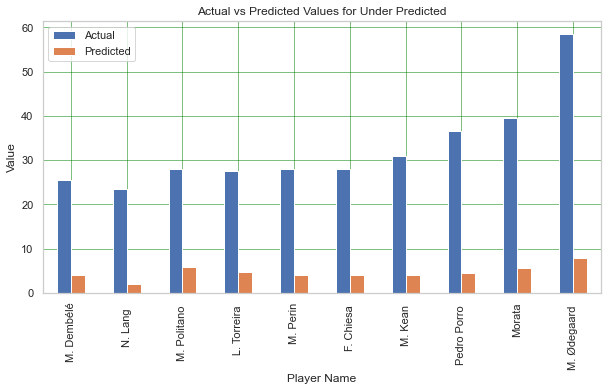

In [47]:
#Plot the comparision of Actual and Predicted Values for Under Predicted
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Under Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

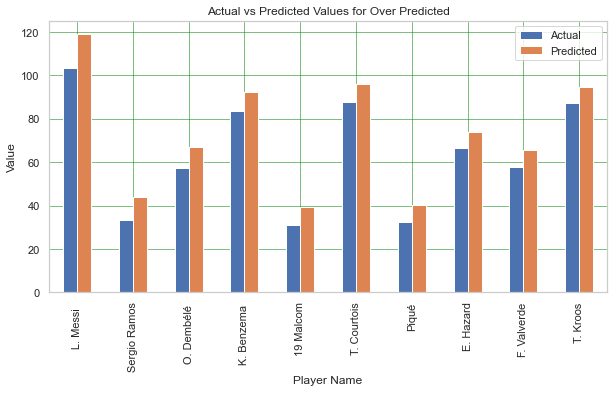

In [48]:
#Plot the comparision of Actual and Predicted Values for Over Predicted

df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

In [49]:
#Calculating MAE, MSE, RMSE and R^2 values of our model
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Linear Regression R^2:',regressor.score(X,y))

Mean Absolute Error: 0.6808665518416576
Mean Squared Error: 2.462396613141665
Root Mean Squared Error: 1.5692025405095624
Linear Regression R^2: 0.9609596337431809


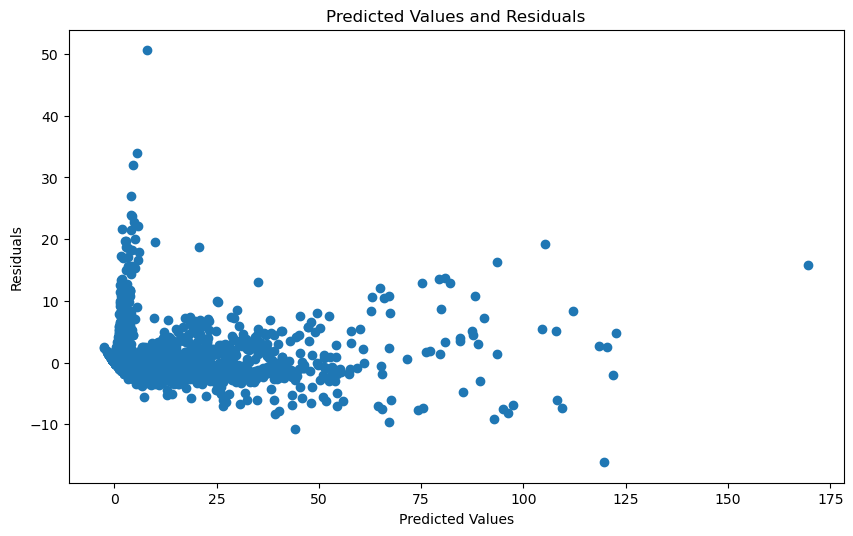

In [50]:
#Plotting Residuals
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(resultsb.predict(), resultsb.resid);
plt.title("Predicted Values and Residuals")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.show()

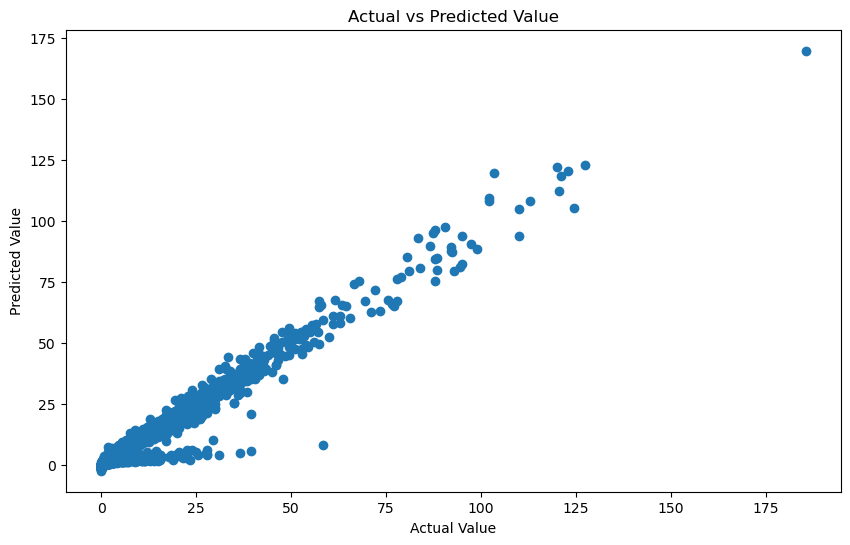

In [51]:
# Actual Values vs Predicted Values
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(y, resultsb.predict(X))
plt.title ("Actual vs Predicted Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [52]:
#Model based on most selected columns

X1= players.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause']]
y1= players.loc[:,"Value"]

player_model1 = sm.OLS(y1, X1, data=players)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          8.047e+04
Date:                Mon, 31 May 2021   Prob (F-statistic):                        0.00
Time:                        17:40:29   Log-Likelihood:                         -29263.
No. Observations:               15265   AIC:                                  5.854e+04
Df Residuals:                   15260   BIC:                                  5.857e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [53]:
#Correlation matrics of selected features
players_selected_features= players[['Value','Overall','Age','Int_Reputation','Growth','Release_Clause']]

players_selected_features.corr()

,Value,Overall,Age,Int_Reputation,Growth,Release_Clause
Value,1.000000,0.567847,0.063538,0.453532,-0.136062,0.975712
Overall,0.567847,1.000000,0.508411,0.452740,-0.590560,0.532194
Age,0.063538,0.508411,1.000000,0.390108,-0.855052,0.054648
Int_Reputation,0.453532,0.452740,0.390108,1.000000,-0.272582,0.423640
Growth,-0.136062,-0.590560,-0.855052,-0.272582,1.000000,-0.118766
Release_Clause,0.975712,0.532194,0.054648,0.423640,-0.118766,1.000000


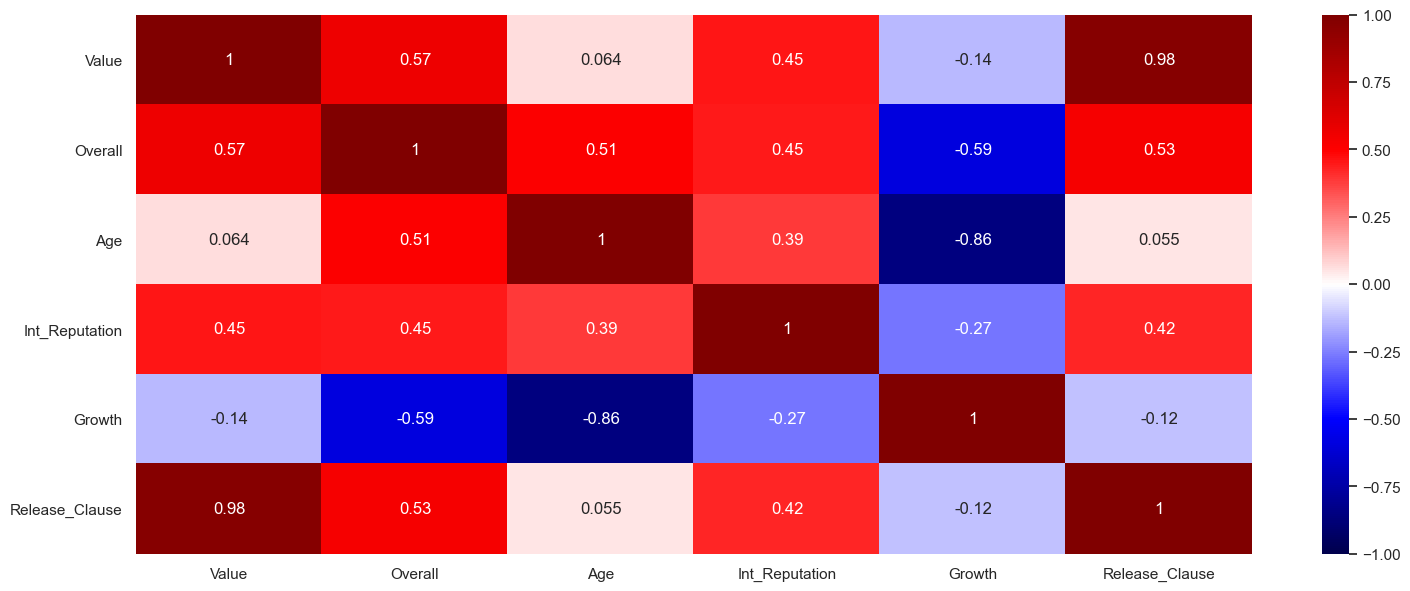

In [54]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(players_selected_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

<Figure size 1800x700 with 0 Axes>

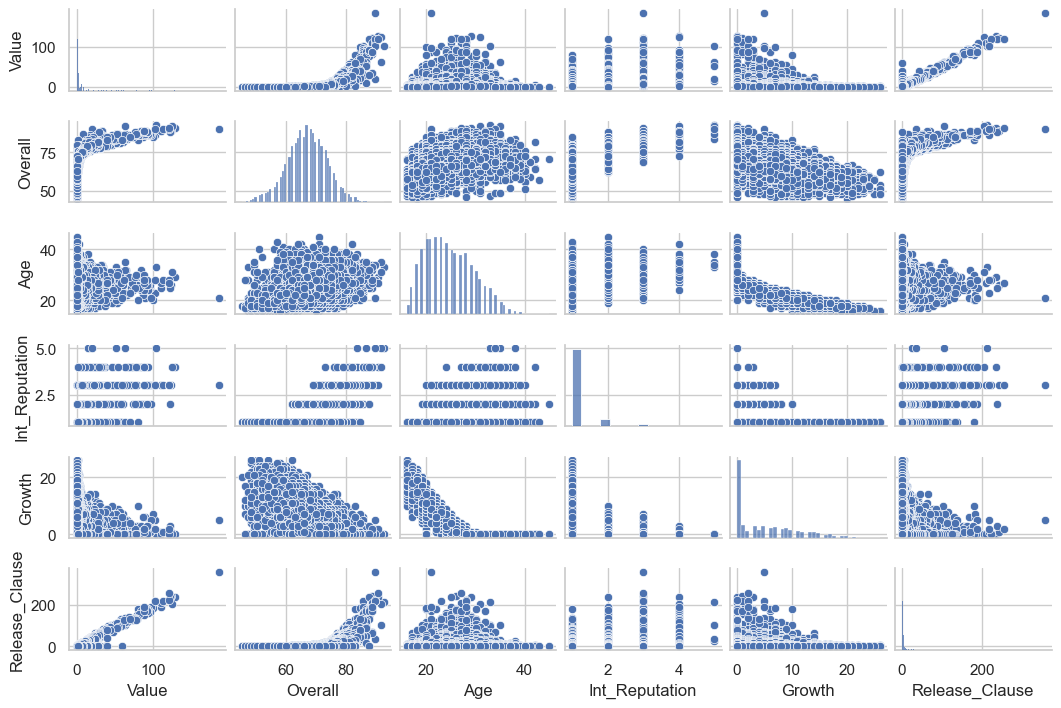

In [55]:
#Pairplot of selected features
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
g=sns.pairplot(players_selected_features, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

In [56]:
#Split data into train, test and validation (%60 - %20)

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,y1, test_size=.25, random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val)
mse = np.mean((pred-y_val)**2)

print(lr.score(X_test,y_test))
print(mse)
print(lr.coef_)

0.9546017321231222
2.9695479786798984
[ 0.0931678  -0.09896426  0.80967122 -0.02929413  0.47660271]


In [57]:
coeff = pd.DataFrame(X_train.columns)

coeff['CoefficientEstimate'] = lr.coef_

coeff.sort_values("CoefficientEstimate")

,0,CoefficientEstimate
1,Age,-0.098964
3,Growth,-0.029294
0,Overall,0.093168
4,Release_Clause,0.476603
2,Int_Reputation,0.809671


In [58]:
#set up the 4 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, y1):.3f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.3f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.3f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'Degree 2 polynomial regression for validayion data R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression for all data R^2: 0.958
Linear Regression for test data R^2: 0.955
Linear Regression for validation data R^2: 0.955

Ridge Regression for test data R^2: 0.951
Ridge Regression for validation data R^2: 0.952

Lasso Regression for test data R^2: 0.487370
Lasso Regression for validation data R^2: 0.487816

Degree 2 polynomial regression for test data R^2: 0.977
Degree 2 polynomial regression for validayion data R^2: 0.977


In [59]:
model= sm.OLS(y1, X1, data=players_selected_features)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          8.047e+04
Date:                Mon, 31 May 2021   Prob (F-statistic):                        0.00
Time:                        17:40:44   Log-Likelihood:                         -29263.
No. Observations:               15265   AIC:                                  5.854e+04
Df Residuals:                   15260   BIC:                                  5.857e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [60]:

# Dummy Variables for Position
X2 = pd.concat([players.drop('Position', axis=1), pd.get_dummies(players['Position'])],axis=1)

X2 = X2.drop(columns=["Value","Name","Team","Foot"])

y2 = yb= players.loc[:,"Value"]

In [61]:
# fit model with target as player market value 
player_model2 = sm.OLS(y2, X2, data=players)

results2 = player_model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     5953.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        17:40:44   Log-Likelihood:                -28521.
No. Observations:               15265   AIC:                         5.717e+04
Df Residuals:                   15201   BIC:                         5.766e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0967      0.006  

In [62]:
# Dummy Variables for Team

X3 = pd.concat([players.drop('Team', axis=1), pd.get_dummies(players['Team'])],axis=1)

X3 = X3.drop(columns=["Value","Name","Position","Foot"])

y3 = yb= players.loc[:,"Value"]

In [63]:
# fit model with target as player market value 
player_model3 = sm.OLS(y3, X3, data=players)

results3 = player_model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     475.9
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        17:40:50   Log-Likelihood:                -27049.
No. Observations:               15265   AIC:                         5.592e+04
Df Residuals:                   14355   BIC:                         6.286e+04
Df Model:                         909                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [64]:
#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 100)
cross_val_score(lm, X1, y1, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')),3))

0.96


# Linear Regression 

In [65]:
#set up the model with log value

X1= players.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= players.loc[:,"Value"]

yl = np.log1p(y1)

player_model1 = sm.OLS(yl, X1, data=players)

results1 = player_model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          6.054e+04
Date:                Mon, 31 May 2021   Prob (F-statistic):                        0.00
Time:                        17:40:51   Log-Likelihood:                         -704.86
No. Observations:               15265   AIC:                                      1422.
Df Residuals:                   15259   BIC:                                      1468.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Overall            0.0852      0.000    206.703      0.000       0.084       0.086
Age               -0.0612      0.001    -77.954      0.000      -0.063      -0.060
Weight             0.0106      0.000     25.555      0.000       0.010       0.011
Height            -0.0222      0.000    -81.721      0.000      -0.023      -0.022
Growth            -0.0108      0.001    -15.584      0.000      -0.012      -0.009
Release_Clause     0.0180      0.000    110.059      0.000       0.018       0.018
==============================================================================
Omnibus:                     2811.576   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77532.647
Skew:                          -0.029   Prob(JB):                         0.00
Kurtosis:                      14.041   Cond. No.                         101.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X1,yl)
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False)

,Coefficient
Overall,0.096843
Release_Clause,0.015943
Growth,0.005246
Height,0.000251
Weight,-0.001860
Age,-0.047942


In [67]:
#Prediction on all data and calculate difference between tha actual value and predicted value
#ye=np.exp(yl)
y_pred = regressor.predict(X1)
df = pd.DataFrame({'Name':players.Name,'Actual': yl, 'Predicted': (y_pred)})
df['Actual_n'] = np.expm1(df['Actual'])
df['Predicted_n'] = np.expm1(df['Predicted'])

#df_under = round(df.sort_values('Difference_n').set_index('Name').head(10),2)
#df_over = round(df.sort_values('Difference_n').set_index('Name').tail(10),2)
df

,Name,Actual,Predicted,Actual_n,Predicted_n
0,20 PC,0.392042,0.601308,0.48,0.824504
1,Adama Traoré,2.995732,2.599785,19.00,12.460838
2,R. Gosens,3.725693,3.514739,40.50,32.607148
3,N. Kanté,4.369448,5.078847,78.00,159.588751
4,N. Vlašić,3.555348,3.269917,34.00,25.309157
...,...,...,...,...,...
17745,19 D. Depetris,1.029619,1.015358,1.80,1.760352
17746,20 Carlos Castro,0.451076,0.653568,0.57,0.922388
17747,J. Silva,0.741937,0.772234,1.10,1.164596
17748,18 J. García Sancho,0.350657,0.645424,0.42,0.906795


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


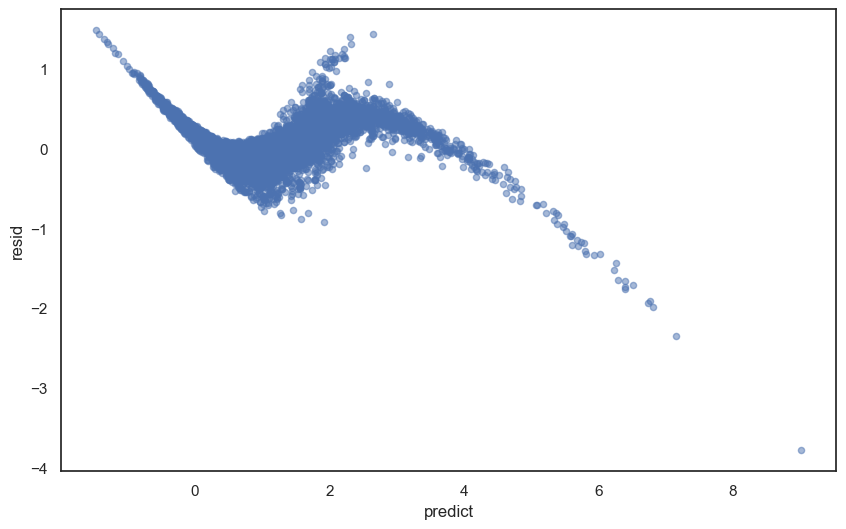

In [68]:
df['predict']=(regressor.predict(X1))
df['resid']= (yl-df.predict)
with sns.axes_style('white'):
    plot = df.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))

# Linear Regression Assumptions

# Assumption 1: Detecting correlation between residuals and observations

<AxesSubplot:>

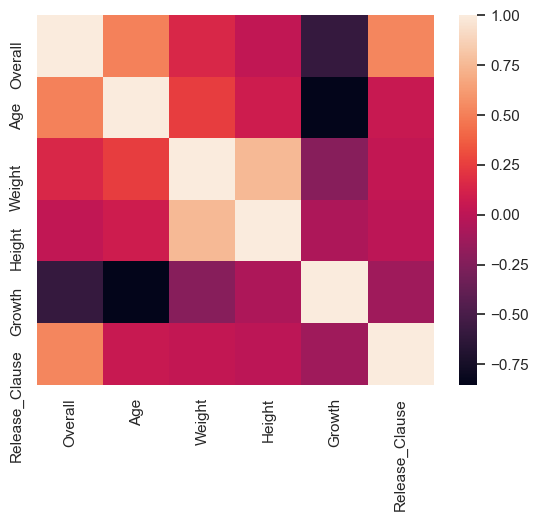

In [69]:
sns.heatmap(X1.corr())

# Assumption 2: multicollinearity test according to Condition Number

In [70]:
#set up the model with log value

X1= players.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= players.loc[:,"Value"]

yl = np.log1p(y1)

player_model1 = sm.OLS(yl, X1, data=players)

results1 = player_model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          6.054e+04
Date:                Mon, 31 May 2021   Prob (F-statistic):                        0.00
Time:                        17:40:52   Log-Likelihood:                         -704.86
No. Observations:               15265   AIC:                                      1422.
Df Residuals:                   15259   BIC:                                      1468.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Overall            0.0852      0.000    206.703      0.000       0.084       0.086
Age               -0.0612      0.001    -77.954      0.000      -0.063      -0.060
Weight             0.0106      0.000     25.555      0.000       0.010       0.011
Height            -0.0222      0.000    -81.721      0.000      -0.023      -0.022
Growth            -0.0108      0.001    -15.584      0.000      -0.012      -0.009
Release_Clause     0.0180      0.000    110.059      0.000       0.018       0.018
==============================================================================
Omnibus:                     2811.576   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77532.647
Skew:                          -0.029   Prob(JB):                         0.00
Kurtosis:                      14.041   Cond. No.                         101.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumption 3: regression is linear in parameters and correctly specified

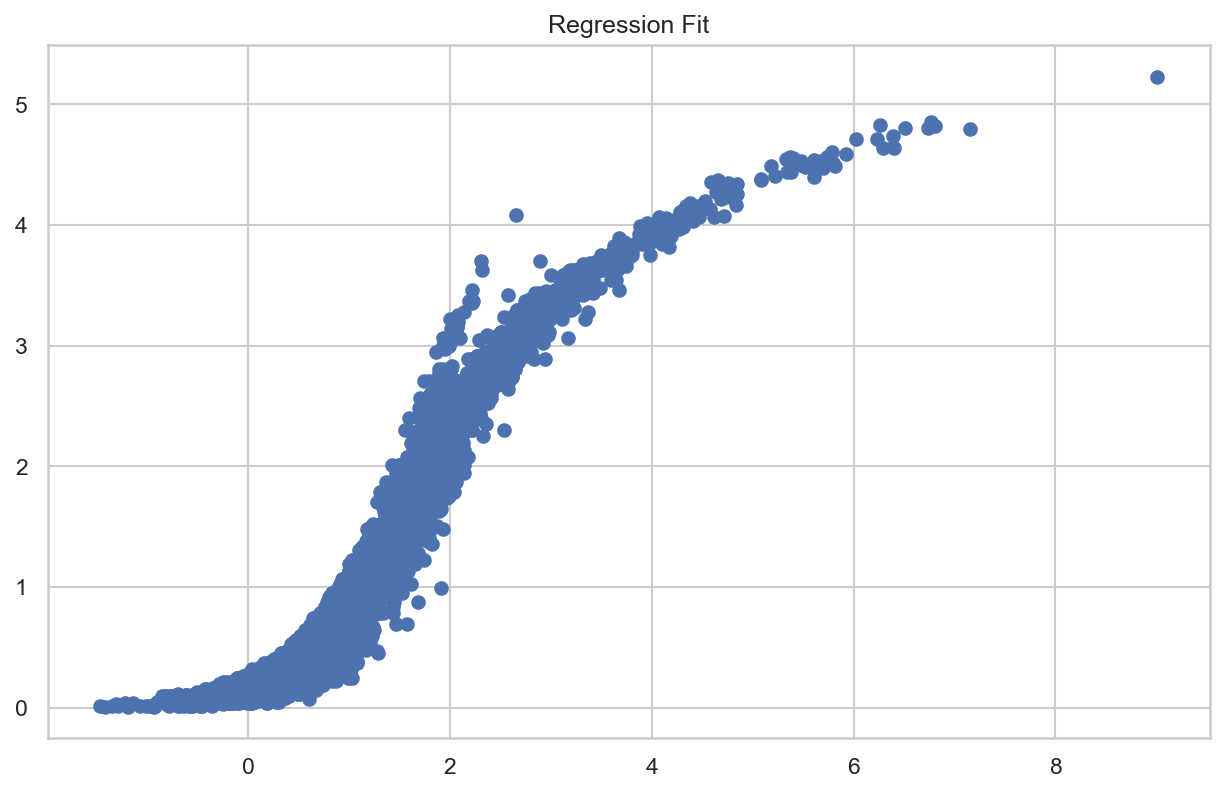

In [71]:

# Regression Fit
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(X1,yl);
pred = lr.predict(X1)
plt.scatter(pred,yl)
plt.title("Regression Fit")
plt.show()

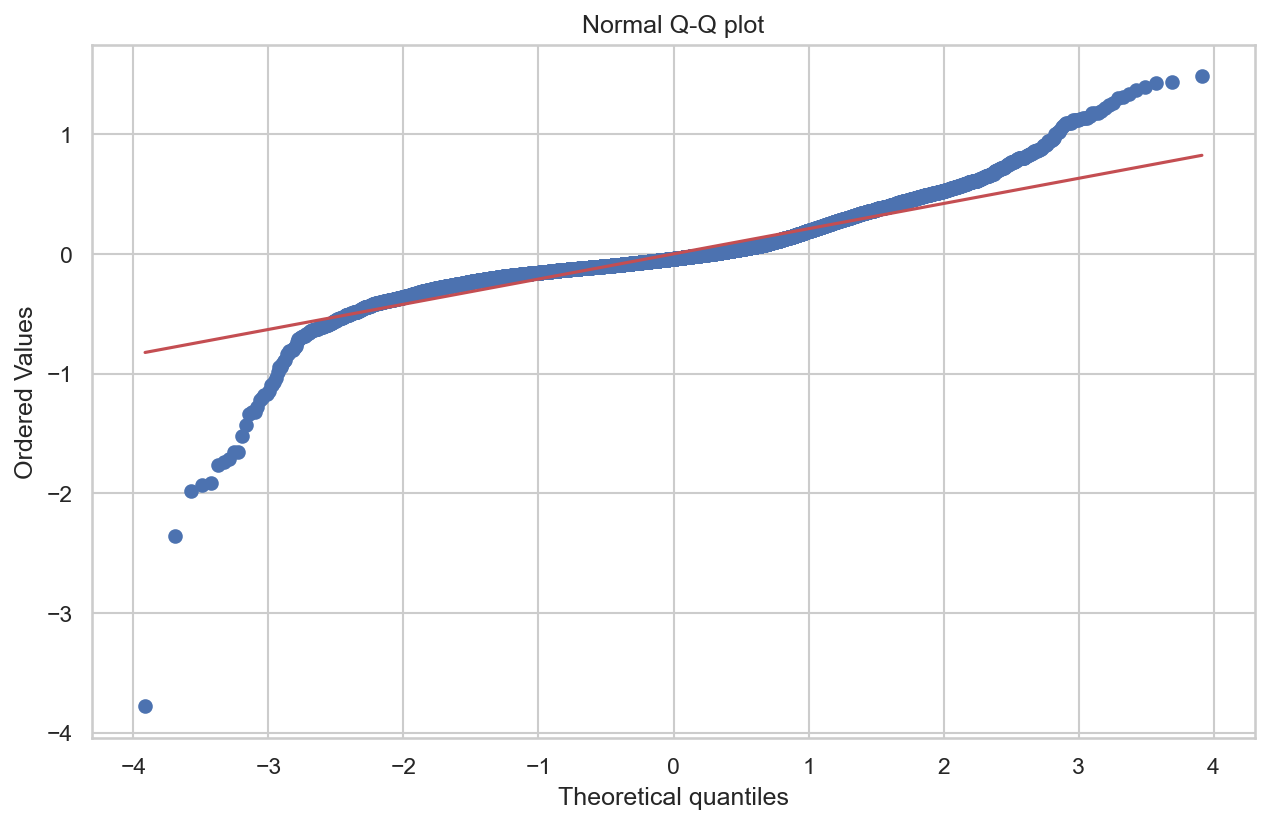

In [72]:
# Normal Q-Q Plot
plt.figure(figsize=(10,6),dpi=150),
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Assumption 4: residuals should be normally distributed with zero mean

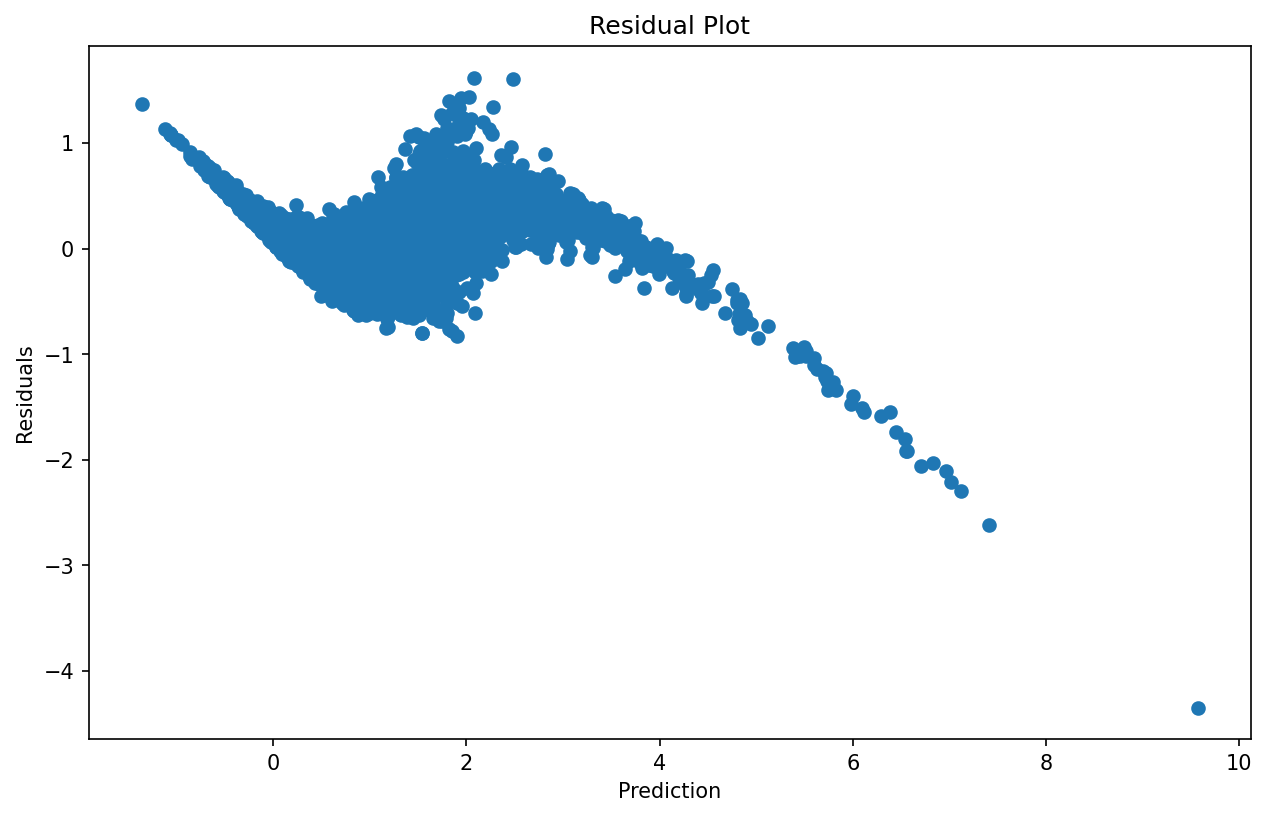

In [73]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis

player_model = sm.OLS(yl, X1, data=players)

resultsl = player_model.fit()

plt.figure(figsize=(10,6),dpi=150),
plt.style.use('default')
plt.scatter(resultsl.predict(), resultsl.resid);
plt.title("Residual Plot")
plt.ylabel("Residuals")
plt.xlabel("Prediction")
plt.show()

# Assumption 5: Homoscedasticity test for residuals

2

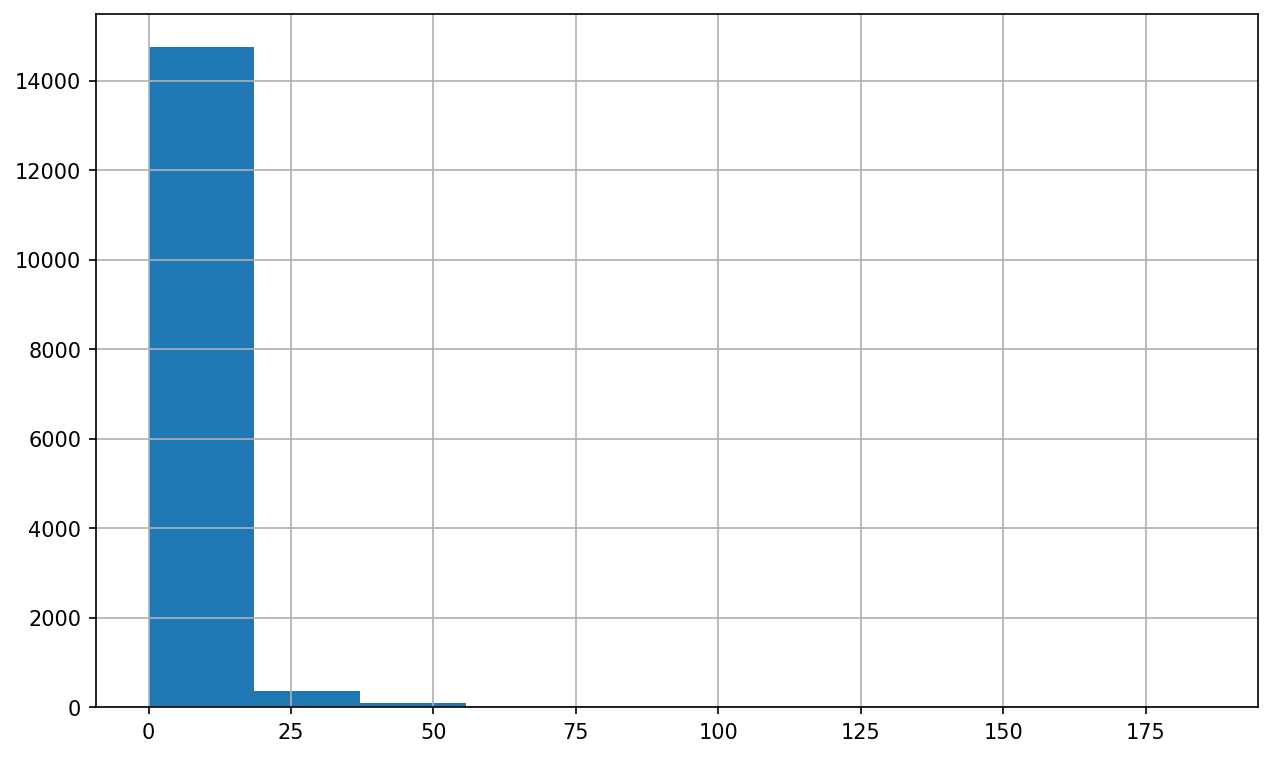

In [74]:
# create histogram
plt.figure(figsize=(10,6),dpi=150),

y1.hist();
2
# note the positive skew

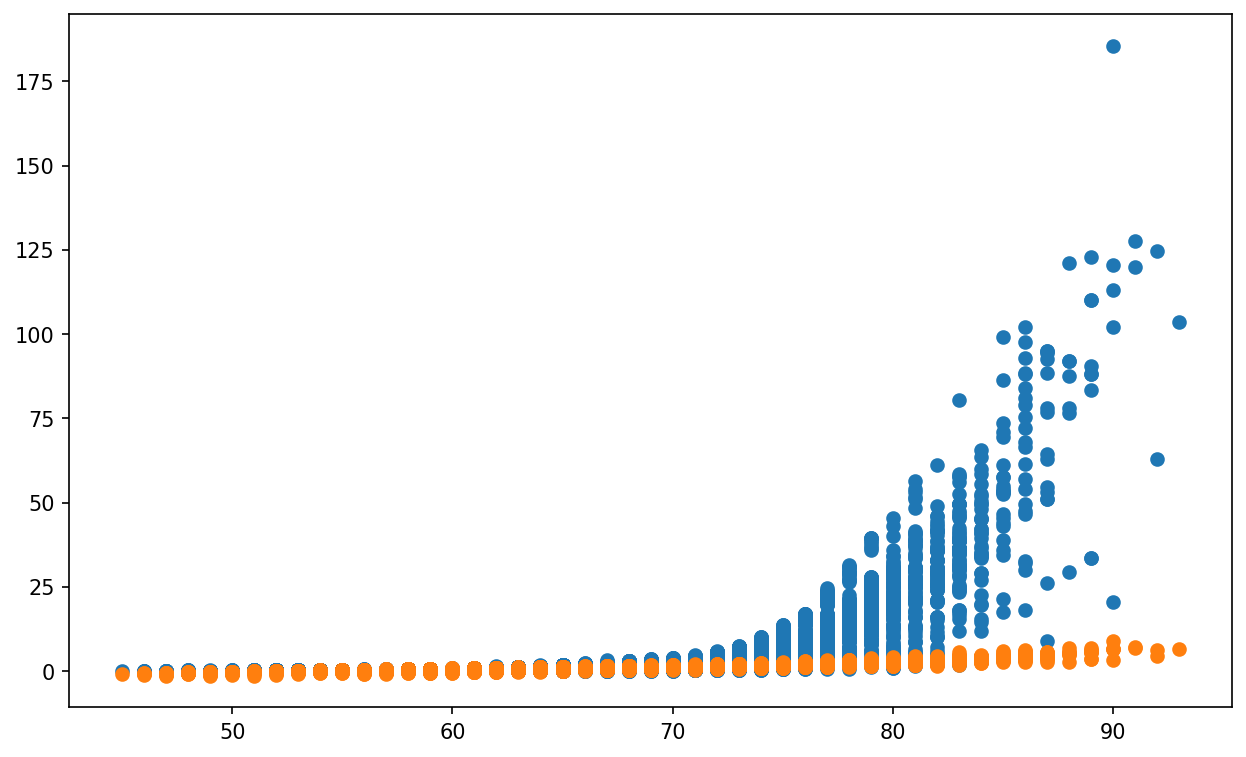

In [75]:
# quick reg plot
plt.figure(figsize=(10,6),dpi=150),


plt.scatter(X1.Overall,y1)
plt.scatter(X1.Overall,df.predict);

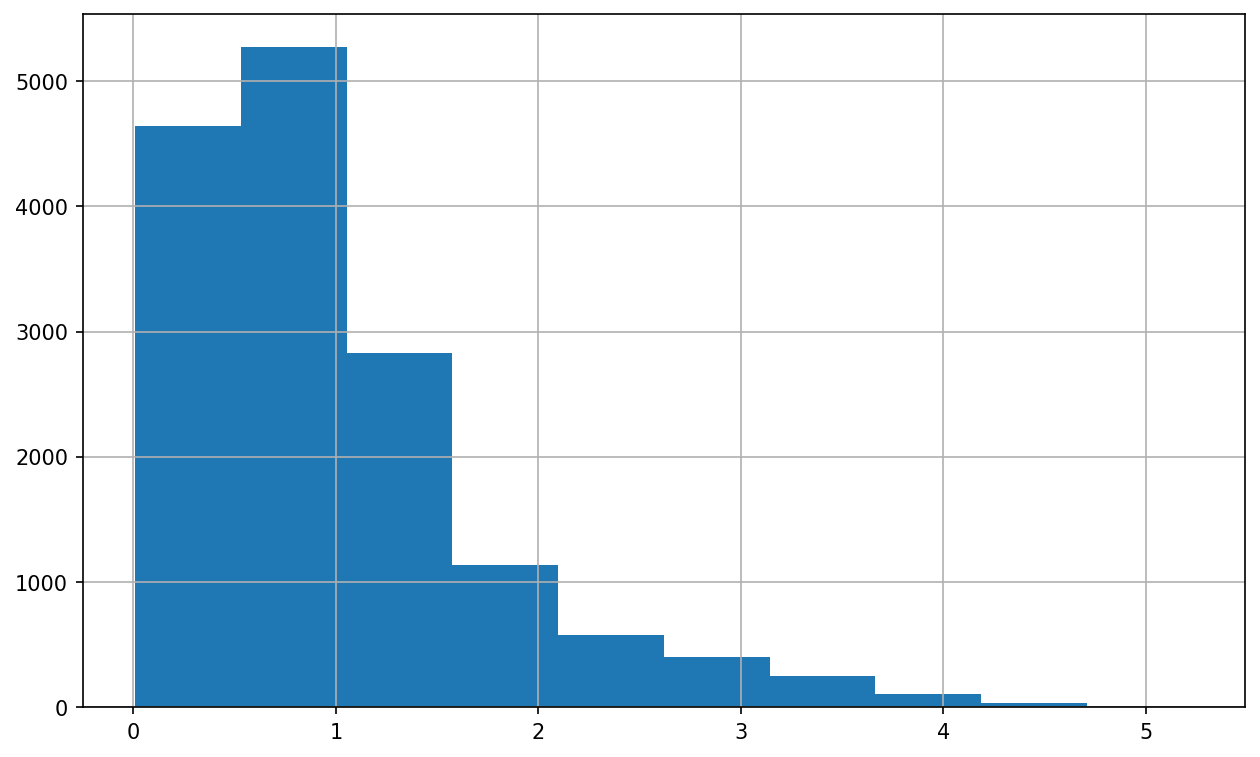

In [76]:
plt.figure(figsize=(10,6),dpi=150),


np.log1p(y1).hist();

# Final Model

In [77]:
#set up the 4 models we're choosing from:

X1= players.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause',]]
y1= players.loc[:,"Value"]

yl = np.log1p(y1)

X_train, X_test, y_train, y_test = train_test_split(X1,yl,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,yl, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, yl):.6f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.6f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.6f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.6f}')
print(f'Degree 2 polynomial regression for validation data R^2: {lm_poly.score(X_val_poly, y_val):.6f}')

Linear Regression for all data R^2: 0.917038
Linear Regression for test data R^2: 0.909776
Linear Regression for validation data R^2: 0.913701

Ridge Regression for test data R^2: 0.905726
Ridge Regression for validation data R^2: 0.909566

Lasso Regression for test data R^2: -0.000011
Lasso Regression for validation data R^2: -0.000091

Degree 2 polynomial regression for test data R^2: 0.980410
Degree 2 polynomial regression for validation data R^2: 0.980514


In [78]:
#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 10)
cross_val_score(lm, X1, yl, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, X1, yl, cv=kf, scoring='r2')),5))

0.91653
